# Multi-Layer Perceptron

### Implementing Step function

In [12]:
import numpy as np

def step_function(x):
    y = x > 0
    return y.astype(np.int32)

In [13]:
# Testing the step function usig random values
x = np.array(np.random.uniform(-5.0, 4.0, 4).round(2).tolist())
y = step_function(x)
print(y)

[1 0 0 1]


### Implementing sigmoid function

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#testing sigmoid function with the same random values used for step function
y = sigmoid(x)
print(y)

[0.96510859 0.10247703 0.21081829 0.64565631]


### Implementing Tanh activation function

In [15]:
def tanh(x):
    return np.tanh(x)

#testing tanh function with the same random values used for step function
y = tanh(x)
print(y)

[ 0.99738936 -0.97426247 -0.86678393  0.53704957]


### Plotting step function, sigmoid function and tanh function

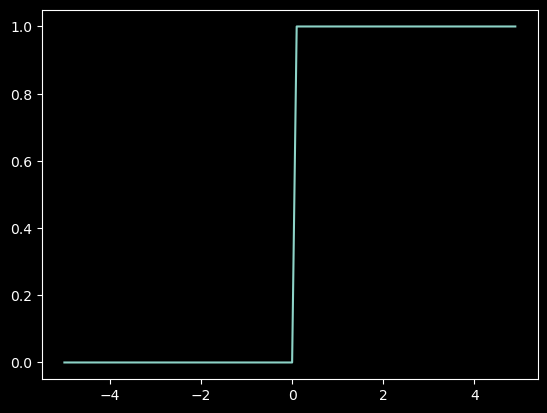

In [16]:
import matplotlib.pyplot as plt

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.show()

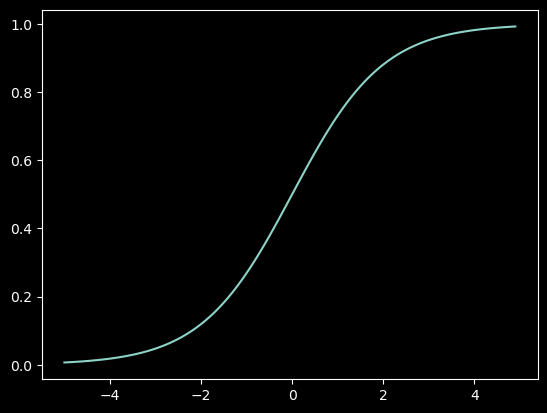

In [17]:
y_sig = sigmoid(x)
plt.plot(x, y_sig)
plt.show()

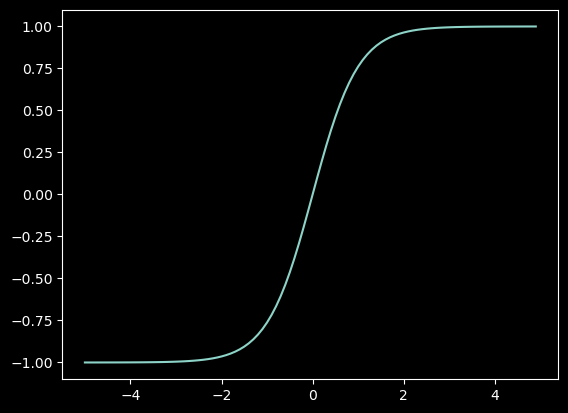

In [18]:
y_tanh = tanh(x)
plt.plot(x, y_tanh)
plt.show()

It can be observed that sigmoid and tanh have similar structure in the plot but if the limits on the y-axis are observed for sigmoid they range from 0 to 1 and for tanh they range from -1 to 1.

### Dot product using numpy

In [19]:
# Input vector
x = np.array([1.0, 0.5])
print(f'input, x = {x}')

# weight, w1
w = np.array([[0.5, -1.0, 2.0], [1.5, 0.0, -0.5]])
print(f'weight1, w1 =\n {w}')
#bias, b1
b = np.array([0.2, -0.3, 0.1])
#output
a = np.dot(x, w) + b
print(f'x.w1 + b = {a}')

input, x = [1.  0.5]
weight1, w1 =
 [[ 0.5 -1.   2. ]
 [ 1.5  0.  -0.5]]
x.w1 + b = [ 1.45 -1.3   1.85]


In [20]:
#apply activation function on 'a'.
z1 = sigmoid(a)
print(f'output after activation, z1 = {z1}')

output after activation, z1 = [0.80999843 0.21416502 0.8641271 ]


In [21]:
# calculations in layer 2
# weight, w2
w2 = np.array([[1.0, -2.0], [-1.0, 1.0], [0.5, 0.5]])
#bias, b2
b2 = np.array([-0.1, 0.3])

# output
a2 = np.dot(z1, w2) + b2
print(f'z1.w2 + b2 = {a2}')
z2 = sigmoid(a2)
print(f'output after activation,z2 = {z2}')

z1.w2 + b2 = [ 0.92789697 -0.6737683 ]
output after activation,z2 = [0.71664843 0.33765357]


In [22]:
# calculations in layer 3
# weight, w3
w3 = np.array([[2.0, -1.0], [1.5, 0.5]])
#bias, b3
b3 = np.array([0.3,-0.4])

#output
a3 = np.dot(z2, w3) + b3
print(f'z2.w3 + b3 = {a3}')
y = (a3)
print(f'Final layer output, y = {y}')

z2.w3 + b3 = [ 2.23977722 -0.94782165]
Final layer output, y = [ 2.23977722 -0.94782165]


### Combine the above code for calculations in a single class and use same weights and biases

In [23]:
class MultilayerPerceptron:
    def __init__(self):
        # Custom Weights and Bias used in the above calculations
        self.w1 = np.array([[0.5, -1.0, 2.0], [1.5, 0.0, -0.5]])
        self.b1 = np.array([0.2, -0.3, 0.1])
        
        self.w2 = np.array([[1.0, -2.0], [-1.0, 1.0], [0.5, 0.5]])
        self.b2 = np.array([-0.1, 0.3])
        
        self.w3 = np.array([[2.0, -1.0], [1.5, 0.5]])
        self.b3 = np.array([0.3, -0.4])
    
    def identify(self, x):
        return x

    # define sigmoid activation function
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    

    def forward(self, x):
        # Forward pass, calculations done in each layer
        a1 = np.dot(x, self.w1) + self.b1
        z1 = self.sigmoid(a1)
        
        a2 = np.dot(z1, self.w2) + self.b2
        z2 = self.sigmoid(a2)
        
        a3 = np.dot(z2, self.w3) + self.b3
        y = self.identify(a3)  
        
        return y

In [25]:
mlp = MultilayerPerceptron()
x = np.array([1.0, 0.5])
print(f'Input to the MLP: {x}')

y = mlp.forward(x)
print(f'Output of the MLP: {y}')

Input to the MLP: [1.  0.5]
Output of the MLP: [ 2.23977722 -0.94782165]


In [27]:
# output for a different input
x = np.array([1.0, -1.5])
y = mlp.forward(x)
print(f'Output of the MLP: {y}')

Output of the MLP: [ 2.44625498 -0.65563223]


### Implementing similar class for a multilayer perceptron but with step function

In [32]:
class MultilayerPerceptron_step:
    def __init__(self):
        # using same weights and bias
        self.w1 = np.array([[0.5, -1.0, 2.0], [1.5, 0.0, -0.5]])
        self.b1 = np.array([0.2, -0.3, 0.1])
        
        self.w2 = np.array([[1.0, -2.0], [-1.0, 1.0], [0.5, 0.5]])
        self.b2 = np.array([-0.1, 0.3])
        
        self.w3 = np.array([[2.0, -1.0], [1.5, 0.5]])
        self.b3 = np.array([0.3, -0.4])
    
    def identify(self, x):
        return x

    # define step function as activation function
    def step_function(self, x):
        y = x > 0
        return y.astype(np.int32)

    def forward(self, x):
        a1 = np.dot(x, self.w1) + self.b1
        z1 = self.step_function(a1)
        
        a2 = np.dot(z1, self.w2) + self.b2
        z2 = self.step_function(a2)

        a3 = np.dot(z2, self.w3) + self.b3
        y = self.identify(a3)  
        
        return y

In [33]:
mlp = MultilayerPerceptron_step()
x = np.array([1.0, 0.5])
print(f'Input to the MLP: {x}')

y = mlp.forward(x)
print(f'Output of the MLP: {y}')

Input to the MLP: [1.  0.5]
Output of the MLP: [ 2.3 -1.4]


### Implementation with tanh function

In [35]:
class MultilayerPerceptron_tanh:
    def __init__(self):
        # using same weights and bias
        self.w1 = np.array([[0.5, -1.0, 2.0], [1.5, 0.0, -0.5]])
        self.b1 = np.array([0.2, -0.3, 0.1])
        
        self.w2 = np.array([[1.0, -2.0], [-1.0, 1.0], [0.5, 0.5]])
        self.b2 = np.array([-0.1, 0.3])
        
        self.w3 = np.array([[2.0, -1.0], [1.5, 0.5]])
        self.b3 = np.array([0.3, -0.4])
    
    def identify(self, x):
        return x

    # define tanh function as activation function
    def tanh(self, x):
        return np.tanh(x)

    def forward(self, x):
        a1 = np.dot(x, self.w1) + self.b1
        z1 = self.tanh(a1)

        a2 = np.dot(z1, self.w2) + self.b2
        z2 = self.tanh(a2)

        a3 = np.dot(z2, self.w3) + self.b3
        y = self.identify(a3)  
        
        return y

In [36]:
mlp = MultilayerPerceptron_tanh()
x = np.array([1.0, 0.5])
print(f'Input to the MLP: {x}')

y = mlp.forward(x)
print(f'Output of the MLP: {y}')

Input to the MLP: [1.  0.5]
Output of the MLP: [ 0.81328918 -1.8494516 ]
